In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from pylab import rcParams
from matplotlib import pyplot as plt

In [2]:
# input
train = './data/course_project_train.csv'
test = './data/course_project_test.csv'

In [3]:
df = pd.read_csv(train)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


df.iloc[0]

df.info()

for colum in df.select_dtypes(include='object').columns:
    print(str(colum) + '\n\n' + str(df[colum].value_counts()) + '\n' + '*' * 100 + '\n')

len(df) - df.count()

In [4]:
for colum in df.select_dtypes(include='object').columns:    
    mas = df[colum].unique()
    dict_mas = { mas[i] : i for i in range(0, len(mas))}
    df[colum] = df[colum].map(dict_mas).astype(int)

In [5]:
# Согласно расчету кредитного рейтинга проблемные займы учитываются в течении 7 лет
df.loc[ df['Months since last delinquent'] > 84, 'Months since last delinquent'] = np.nan

In [6]:
# текуший кредит 99999999.0 является ошибкой
df.loc[df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = df['Maximum Open Credit']-df['Current Credit Balance']

In [7]:
# согласно методики расчета кредитного рейтинга США лежит в диапазоне от 300 до 850
df.loc[ df['Credit Score'] > 850, 'Credit Score'] = df['Credit Score']/10

In [8]:
df.loc[(df['Maximum Open Credit']-(df['Years of Credit History']*df['Annual Income'])*0.5) > 0, 'Maximum Open Credit']\
    = (df['Current Loan Amount'] + df['Current Credit Balance']) * 0.7

In [9]:
col = list(df.columns)


In [10]:
df.loc[df['Current Credit Balance'] > df['Annual Income']]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
162,1,2131591.0,7,0.0,15.0,31.7,4191176.0,0.0,NaN,0.0,0,0,269258.0,3547262.0,20783.0,728.0,0
226,1,509599.0,0,0.0,12.0,38.7,836220.0,0.0,NaN,0.0,1,0,128744.0,578474.0,14354.0,704.0,0
561,0,1709829.0,2,0.0,16.0,32.0,6230994.0,0.0,46.0,0.0,2,0,131978.0,1754308.0,35764.0,750.0,0
1233,1,1602403.0,10,0.0,12.0,19.7,3507042.0,0.0,NaN,0.0,0,1,458392.0,2913707.0,42464.0,676.0,0
1365,1,1734529.0,1,0.0,8.0,15.6,2391576.0,0.0,42.0,0.0,1,0,331056.0,1774220.0,50446.0,728.0,0
1580,1,3783660.0,6,0.0,9.0,17.0,7204516.0,0.0,NaN,0.0,0,0,2954843.0,4249673.0,42251.0,739.0,0
1738,0,967480.0,11,0.0,15.0,28.5,2164008.0,0.0,NaN,0.0,1,1,224048.0,1510082.0,27492.0,665.0,0
1879,1,1433835.0,3,0.0,8.0,17.8,12701436.0,0.0,35.0,0.0,0,0,197384.0,1985462.0,14099.0,749.0,0
1931,1,2773468.0,1,0.0,8.0,29.0,3979206.0,0.0,12.0,0.0,0,0,707577.0,3271629.0,43682.0,727.0,0
2036,1,1172984.0,8,0.0,6.0,24.2,9094184.0,0.0,NaN,0.0,6,1,335324.0,1413733.0,8709.0,748.0,0


In [11]:
df['Debt-to-income ratio'] = df['Monthly Debt']/(df['Annual Income']/12)*100

In [12]:
conditions = [
    (df['Credit Score'] <= 850 ) & (df['Credit Score'] > 719),
    (df['Credit Score'] <= 719 ) & (df['Credit Score'] > 689),
    (df['Credit Score'] <= 689 ) & (df['Credit Score'] > 629),
    (df['Credit Score'] <= 629 ) & (df['Credit Score'] >=300)]
choices = [0, 1, 2, 4]
df['Credit score ranges'] = np.select(conditions, choices, default = np.nan)

In [13]:
df['long Credit History'] = (df['Years of Credit History'] > 10 ).astype(int)

In [14]:
df['DTI'] = (df['Debt-to-income ratio'] > 28 ).astype(int)

In [15]:
df['Credit Utilization Ratio'] = df['Current Loan Amount'] / (df['Current Loan Amount'] + df['Current Credit Balance'])

In [16]:
df['Ratio to income'] =  df['Annual Income'] / (df['Current Loan Amount'] + df['Current Credit Balance'])

In [17]:
df['months of loan repayments'] = df['Current Loan Amount'] / df['Monthly Debt']

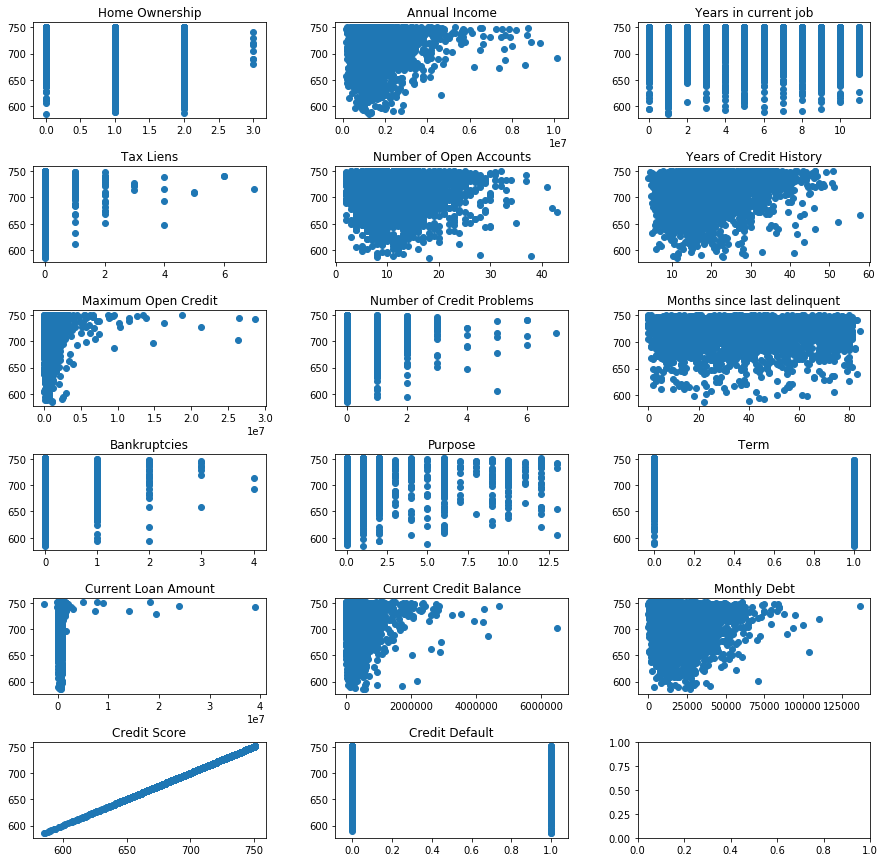

In [18]:
fig, ax = plt.subplots(nrows=6, ncols=3)
ax = ax.flatten()
for i, j in enumerate(col):
    ax[i].scatter(df[j], df['Credit Score'])
    ax[i].set_title(j)
fig.set_size_inches(15, 15)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [19]:
df.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Monthly Debt,Credit Score,Credit Default,Debt-to-income ratio,Credit score ranges,long Credit History,DTI,Credit Utilization Ratio,Ratio to income,months of loan repayments
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3415.000000,7486.000000,...,7500.000000,5943.000000,7500.000000,5943.000000,5943.000000,7500.000000,7500.000000,7494.000000,5943.000000,7499.000000
mean,1.344133,1.366392e+06,4.619733,0.030133,11.130933,18.317467,8.490825e+05,0.170000,34.619912,0.117152,...,18314.454133,720.086993,0.281733,17.136302,0.529699,0.913333,0.080933,-inf,inf,inf
std,0.633634,8.453392e+05,3.549875,0.271604,4.908924,7.041946,1.509201e+07,0.498598,21.592953,0.347192,...,11926.764673,27.957233,0.449874,7.925588,0.813107,0.281365,0.272751,NaN,NaN,NaN
min,0.000000,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,0.071134,-213.600356
25%,1.000000,8.443410e+05,1.000000,0.000000,8.000000,13.500000,2.790975e+05,0.000000,16.000000,0.000000,...,10067.500000,708.000000,0.000000,11.199956,0.000000,1.000000,0.000000,0.444530,1.588185,10.959569
50%,1.000000,1.168386e+06,4.000000,0.000000,10.000000,17.000000,4.780490e+05,0.000000,32.000000,0.000000,...,16076.500000,729.000000,0.000000,16.700531,0.000000,1.000000,0.000000,0.553148,2.267970,17.288347
75%,2.000000,1.640137e+06,8.000000,0.000000,14.000000,21.800000,7.931660e+05,0.000000,50.000000,0.000000,...,23818.000000,740.000000,1.000000,22.700269,1.000000,1.000000,0.000000,0.677268,3.381392,27.215373
max,3.000000,1.014934e+07,11.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,84.000000,4.000000,...,136679.000000,751.000000,1.000000,39.900901,4.000000,1.000000,1.000000,1.000000,inf,inf


In [20]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

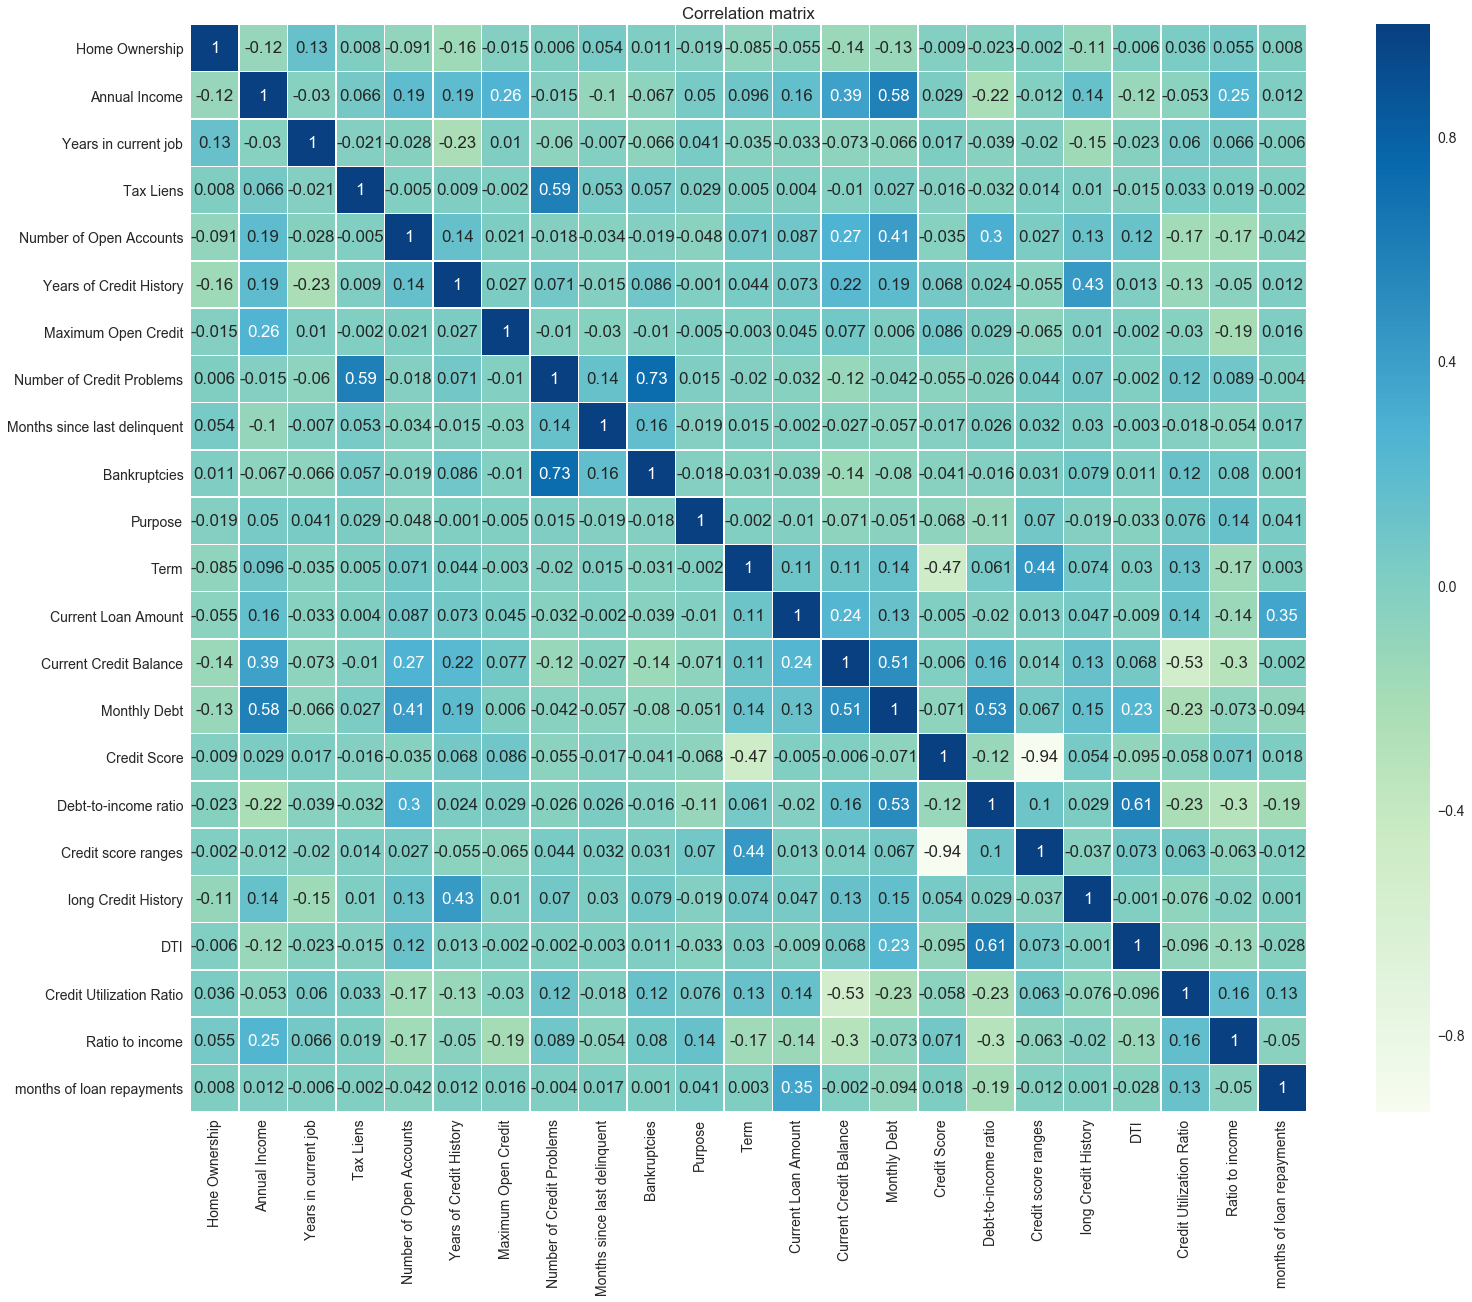

In [21]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

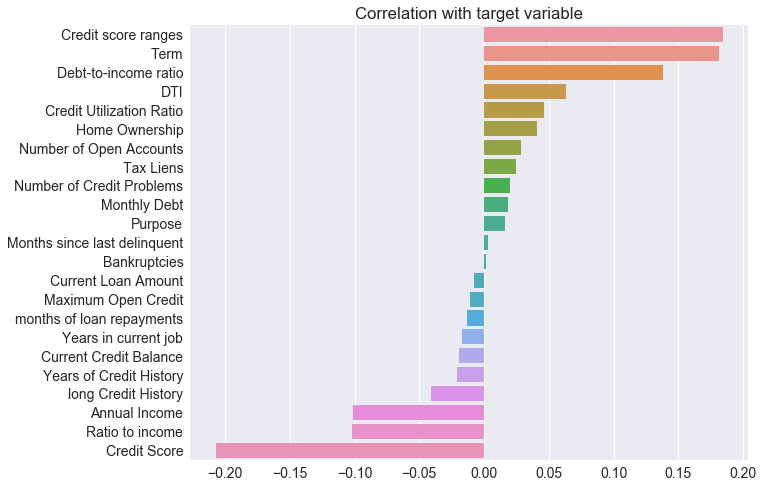

In [22]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

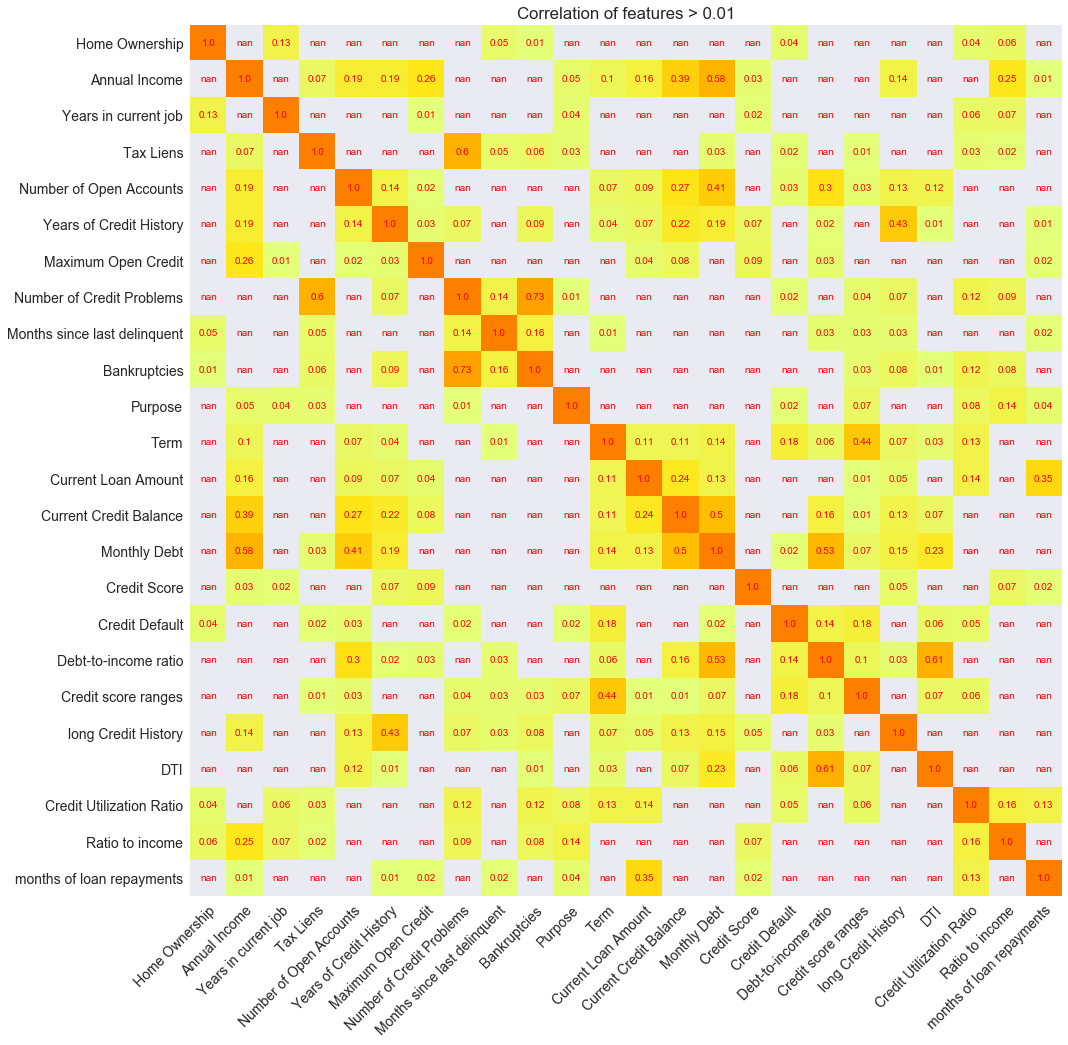

In [23]:
data_columns = df.columns
correlation = df.corr()
# прорисовываем температурную карту (heatmap) по перекрессной корреляции показателей
# для определения наиболее взаимозависимых показателей

# Размер графика
rcParams['figure.figsize'] = 15, 15
# Задаем отсекающий коэффициент корреляции. Ниже этого коэфф. считаем, что корреляция пары показателей не сильная.
correlation_rate_filter = 0.01

#Определяем колонки, столбцы и данные для построение heatmap
hm_index = correlation.index
hm_colums = correlation.columns
hm_data = np.array(correlation.where(correlation > abs(correlation_rate_filter))).round(2)


fig, ax = plt.subplots()
im = ax.imshow(hm_data, cmap="Wistia")

# Столбцы и индексы
ax.set_xticks(np.arange(len(hm_colums)))
ax.set_yticks(np.arange(len(hm_index)))
ax.set_xticklabels(hm_colums)
ax.set_yticklabels(hm_index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Подписи к столбцам и индексам.
for i in range(len(hm_index)):
    for j in range(len(hm_colums)):
        text = ax.text(j, i, hm_data[i, j],
                       ha="center", va="center", color="r", fontsize=10)

ax.set_title(f"Correlation of features > {correlation_rate_filter}")
fig.tight_layout()
plt.grid()
plt.show()